In [1]:
import sys
sys.path.append('..')
import time
from astropy.table import Table
import pyfits as fits
import numpy as np
import matplotlib.pyplot as plt
from os.path import expanduser
from deeplens.resnet_classifier import deeplens_classifier

from deeplens.utils.blfchallenge import classify_ground_challenge 

from sklearn import metrics

home = expanduser("~")


imgs = 240

# Path to the downloaded files
# download_path=home+'/Desktop/' # To be adjusted on your machine
download_path='//Volumes/CJSTORFER/' # To be adjusted on your machine



# Path to export the data
export_path=home+'/Desktop/'   # To be adjusted on your machine


#Loads x, y dataset that belong to the previously trained CNN

d = Table.read(export_path+'catalogs_'+str(imgs)+'_RGB.hdf5', path='/ground')  

x = np.asarray(d['image']).reshape((-1,3,101,101))
print x.shape

y = np.asarray(d['is_lens']).reshape((-1,1))
print y.shape




# x = np.asarray(d['image'])[0:120,:,:,:].reshape((-1,3,101,101))
# print x.shape

# y = np.asarray(d['is_lens'])[0:120,].reshape((-1,1))
# print y.shape


# x_additional = np.asarray(d['image'])[120:500,:,:,:].reshape((-1,3,101,101))
# y_additional = np.asarray(d['is_lens'])[120:500,].reshape((-1,1))

# x_nonlens = np.zeros((0,3,101,101))
# for a, b in zip(x_additional, y_additional):
#     if b==0:
#         print b
#         print a.shape
#         print x_nonlens.shape
#         print b.shape
#         x_nonlens = np.concatenate((x_nonlens,a.reshape(1,3,101,101)),axis = 0)

        
# x_nonlens = x_nonlens[0:120]
# y_nonlens = np.zeros((120,))

# x = np.concatenate((x, x_nonlens))
# y = np.concatenate((y.reshape(120,), y_nonlens)).reshape(240,1)



# Clipping and scaling parameters applied to the data as preprocessing
# print 'max', np.amax(x)
# print 'min', x.min()

vmin=-1e-9
vmax=1e-9
scale=100

mask = np.where(x == 100)

x[mask] = 0

# Simple clipping and rescaling the images
x = np.clip(x, vmin, vmax)/vmax * scale

x[mask] = 0

# print 'max', np.amax(x)
# print 'min', np.amin(x)

print 'Lens(1): '+ str(np.sum(y==1))
print 'Non-lens(0): '+ str(np.sum(y==0))



Using Theano backend.


(240, 3, 101, 101)
(240, 1)
Lens(1): 104
Non-lens(0): 136


[0]


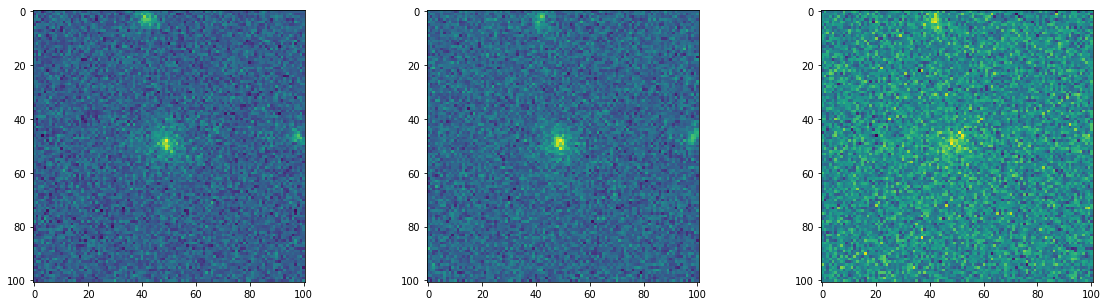

In [2]:
i = 6
plt.figure(figsize=(20,5))
plt.subplot(131)
plt.imshow(x[i][0].T)
plt.subplot(132)
plt.imshow(x[i][1].T)
plt.subplot(133)
plt.imshow(x[i][2].T)
print y[i]

In [29]:
model = deeplens_classifier()
model.load('/Users/Chris/CMUDeepLens/Trained_Sets/240imgs_120epochs_RGB/deeplens_params_final.npy', x, y)

loading from /Users/Chris/CMUDeepLens/Trained_Sets/240imgs_120epochs_RGB/deeplens_params_final.npy...
Model loaded


In [47]:
ims = np.zeros((61, 3, 101, 101))
counter = 0
 
files = 61

# Loads the images
for i in range (files):
    ims[i] = fits.getdata('/Users/Chris/Desktop/Training_Set/Lenses/cutout_{}.fits'.format(i))

# Concatenate images to catalog
x_test_1 = ims

print "Done !"

Done !


In [48]:
y_test_1 = np.ones((61,1))

# PREPROCESSING:

In [49]:
print x_test_1.min()
print x_test_1.max()*100/x_test_1.max()

-0.0792586356401
100.0


In [50]:
# j = 0
# plt.figure(figsize=(20,5))
# plt.subplot(131)
# plt.imshow(x_test_1[j][0].T)
# plt.subplot(132)
# plt.imshow(x_test_1[j][1].T)
# plt.subplot(133)
# plt.imshow(x_test_1[j][2].T)

In [51]:
vmin_test = -1
vmax_test = 1

scale_test_1 = 100/x_test_1.max()

mask = np.where(x_test_1 == 100)

x_test_1[mask] = 0


x_test_1 = np.clip(x_test_1, vmin_test, vmax_test) * scale_test_1

x_test_1[mask] = 0

In [52]:
# j = 0
# plt.figure(figsize=(20,5))
# plt.subplot(131)
# plt.imshow(x_test_1[j][0].T)
# plt.subplot(132)
# plt.imshow(x_test_1[j][1].T)
# plt.subplot(133)
# plt.imshow(x_test_1[j][2].T)

In [53]:
prediction = model.predict(x_test_1)

In [54]:
# prediction.reshape(1,61)
# print prediction
np.sum(prediction)

54

In [8]:
files = 168
ims_0 = np.zeros((files, 3, 101, 101))
counter = 0
 

for i in range (files):
    ims_0[i] = fits.getdata('/Users/Chris/Desktop/Training_Set/Non-Lenses/cutout_000{:03d}.fits'.format(i))
x_test_0 = ims_0
y_test_0 = np.zeros((168,1))

In [9]:
mask = np.where(x_test_0 == 100)

scale_test_0 = 100/x_test_0.max()

x_test_0[mask] = 0


x_test_0 = np.clip(x_test_0, vmin_test, vmax_test) * scale_test_0


x_test_0[mask] = 0

In [14]:
print x_test_0.shape

(168, 3, 101, 101)


In [32]:
prediction_0 = model.predict(x_test_0)
np.sum(prediction_0)


8

In [19]:
prob_0 = model.predict_proba(x_test_0)

In [20]:
# print prob_0

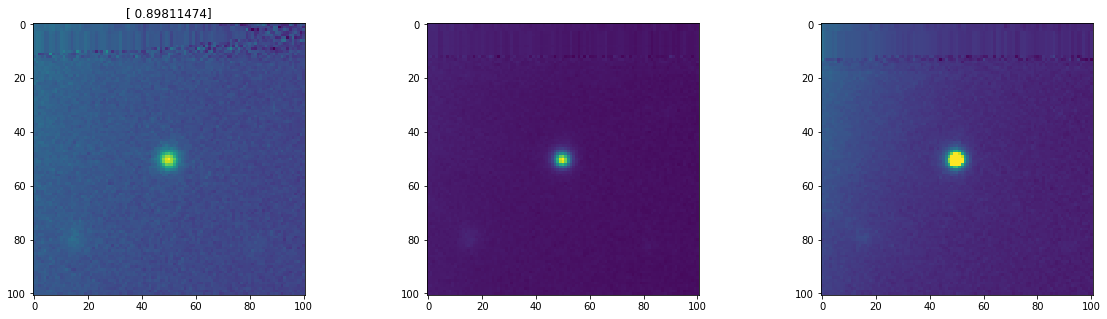

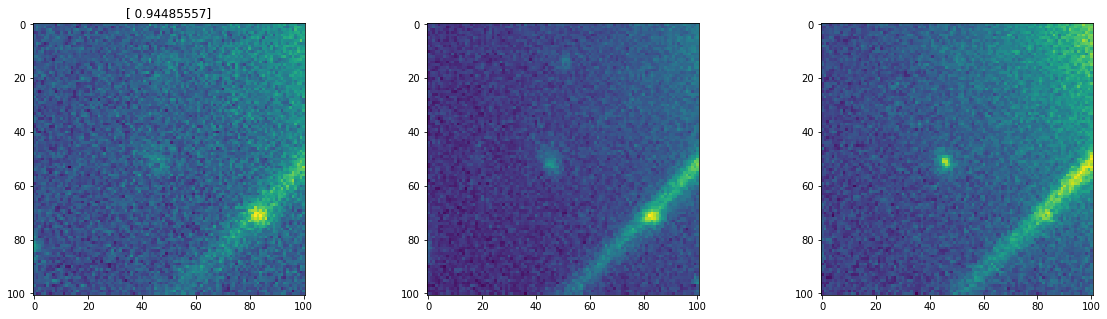

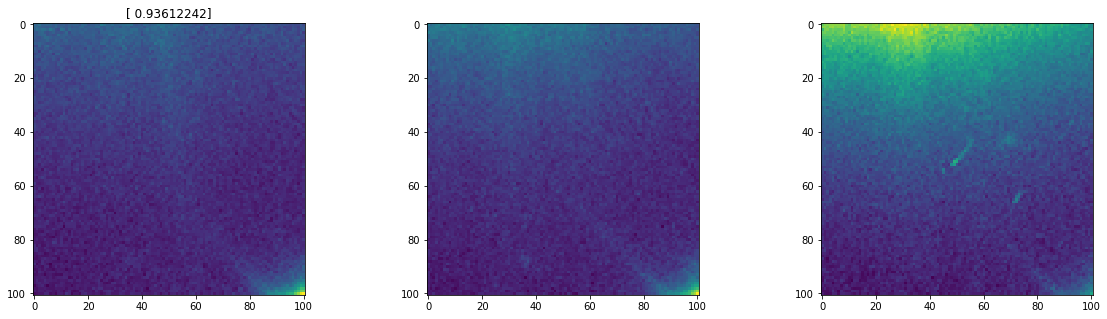

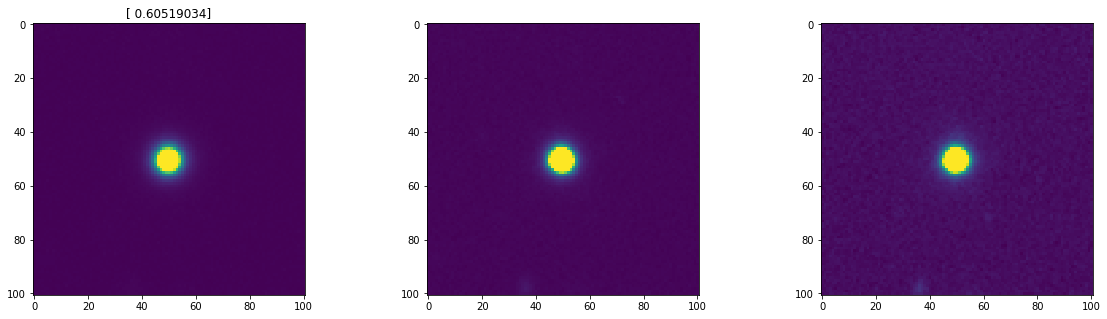

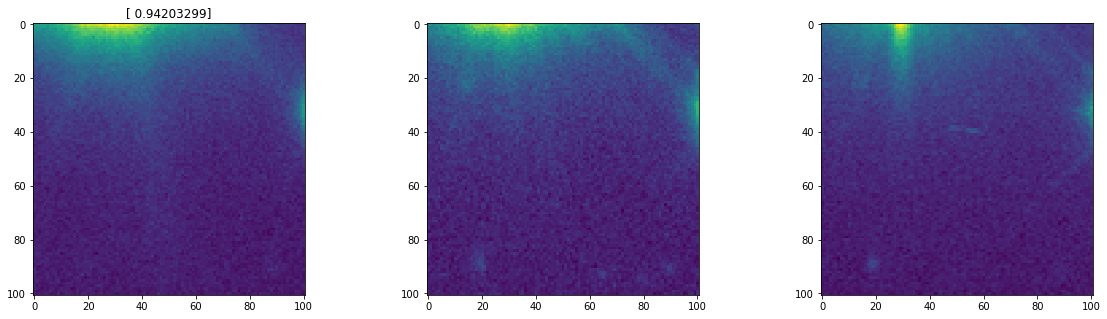

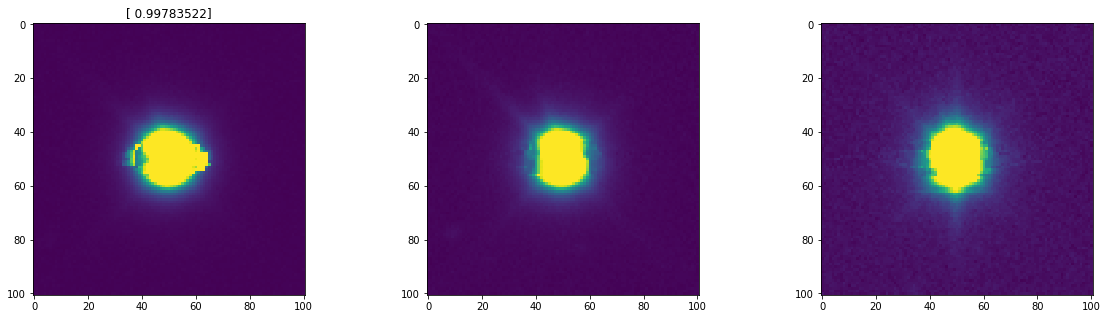

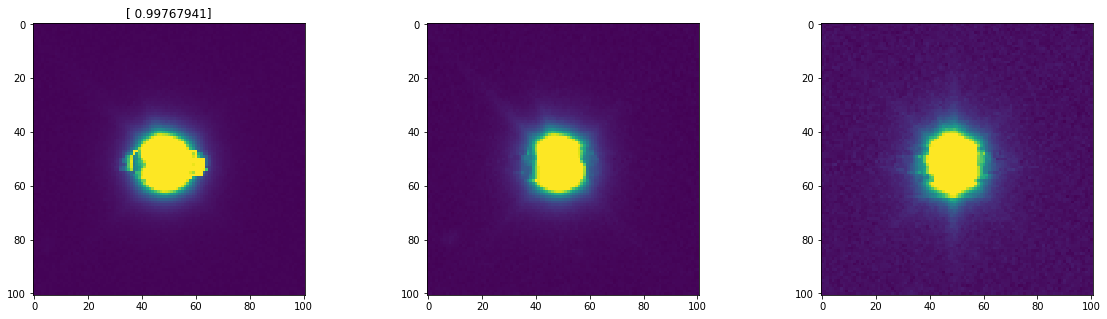

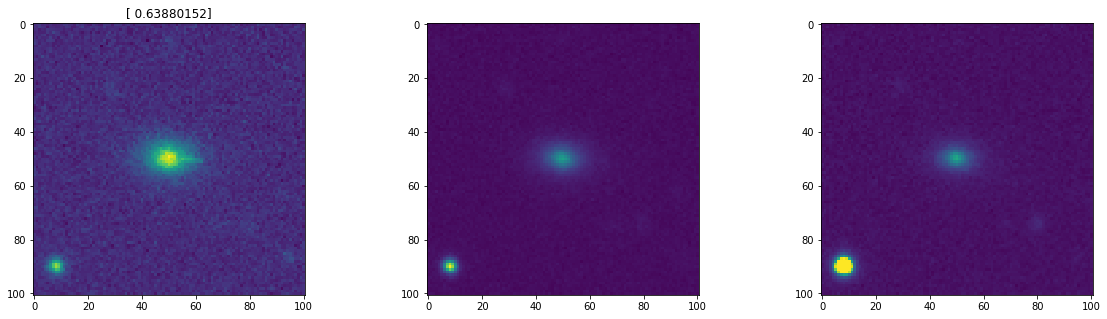

In [33]:
for i, prob in enumerate(prob_0):
    if prob>0.5:
        plt.figure(figsize=(20,5))
        plt.subplot(131)
        plt.title(prob)
        plt.imshow(x_test_0[i][0])
        plt.subplot(132)
        plt.imshow(x_test_0[i][1])
        plt.subplot(133)
        plt.imshow(x_test_0[i][2])

In [33]:
prob_1 = model.predict_proba(x_test_1)

In [34]:
# print prob_1

[[ 0.65844542]
 [ 0.25134647]
 [ 0.98092949]
 [ 0.74763805]
 [ 0.34507534]
 [ 0.98774362]
 [ 0.99002171]
 [ 0.98474538]
 [ 0.98469961]
 [ 0.9921422 ]
 [ 0.99543321]
 [ 0.77881855]
 [ 0.62838459]
 [ 0.99152356]
 [ 0.98109692]
 [ 0.97455418]
 [ 0.8153823 ]
 [ 0.99649274]
 [ 0.99810731]
 [ 0.99567395]
 [ 0.96822733]
 [ 0.39762607]
 [ 0.9963361 ]
 [ 0.35631359]
 [ 0.77875006]
 [ 0.97545463]
 [ 0.99148101]
 [ 0.83852482]
 [ 0.97049123]
 [ 0.99208665]
 [ 0.76496136]
 [ 0.59361637]
 [ 0.99689949]
 [ 0.94569784]
 [ 0.99794281]
 [ 0.96804053]
 [ 0.8825047 ]
 [ 0.42997742]
 [ 0.66296154]
 [ 0.98272502]
 [ 0.99208152]
 [ 0.99589264]
 [ 0.994304  ]
 [ 0.98178583]
 [ 0.98448044]
 [ 0.93575454]
 [ 0.65575814]
 [ 0.99786603]
 [ 0.00151312]
 [ 0.98654073]
 [ 0.99757302]
 [ 0.84257621]
 [ 0.9930976 ]
 [ 0.96068174]
 [ 0.98007745]
 [ 0.99556816]
 [ 0.49465594]
 [ 0.99612421]
 [ 0.99861383]
 [ 0.99300134]
 [ 0.93186986]]


In [1]:
for j, prob1 in enumerate(prob_1):
    if prob1<0.5:
        plt.figure(figsize=(20,5))
        plt.subplot(131)
        plt.title(prob1)
        plt.imshow(x_test_1[j][0])
        plt.subplot(132)
        plt.imshow(x_test_1[j][1])
        plt.subplot(133)
        plt.imshow(x_test_1[j][2])

NameError: name 'prob_1' is not defined

In [10]:
x_test = np.concatenate((x_test_1,x_test_0))
y_test = np.concatenate((y_test_1,y_test_0))

In [13]:
print x_test.shape
print y_test.shape


(229, 3, 101, 101)
(229, 1)


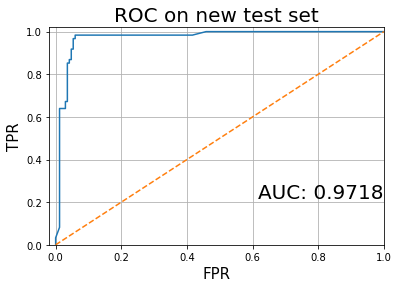

In [17]:
tpr,fpr,th = model.eval_ROC(x_test,y_test)


In [28]:
p, c = model.eval_purity_completeness(x_test,y_test)

In [29]:
print p,c

0.870968 0.885246


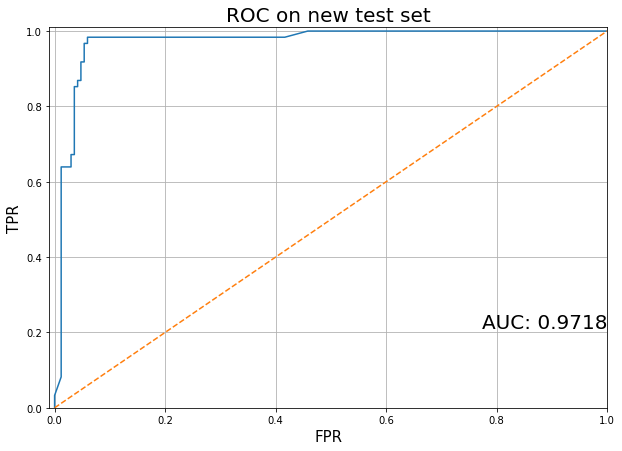

In [27]:
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize= (10,7))
plt.title('ROC on new test set', fontsize=20)
plt.plot(fpr,tpr)
plt.xlabel('FPR', fontsize=15)
plt.ylabel('TPR', fontsize=15)
plt.xlim(0,1)
plt.ylim(0,1.)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.text(1, 0.2, 'AUC: ' + str("%.4f" % roc_auc),
        verticalalignment='bottom', horizontalalignment='right', fontsize=20)
# plt.text(1, 0.1, 'Purity: ' + str("%.4f" % purity),
#         verticalalignment='bottom', horizontalalignment='right', fontsize=20)
# plt.text(1, 0, 'Completeness: ' + str("%.4f" % completeness),
#         verticalalignment='bottom', horizontalalignment='right', fontsize=20)
plt.grid(True)

plt.show()

In [ ]:
x = x.reshape(1,7344720)
x.shape

In [10]:
print np.mean(x)

0.23012201072


In [24]:
x_test_1.shape

(61, 3, 101, 101)

In [56]:
x_test = x_test_1[0].reshape(3,10201)

In [57]:
print np.mean(x_test_1)

0.0314105238008


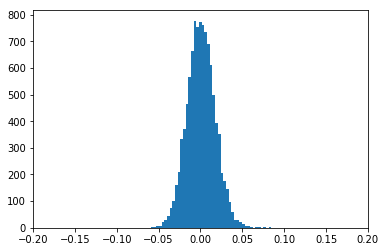

In [69]:
plt.hist(x_test[0], bins = 50)
plt.xlim([-0.2,0.2])
plt.show()

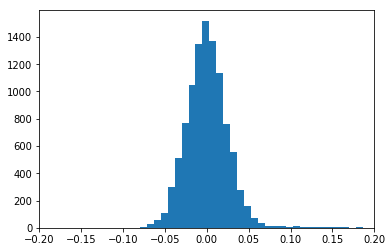

In [68]:
plt.hist(x_test[1], bins = 50)
plt.xlim([-0.2,0.2])
plt.show()

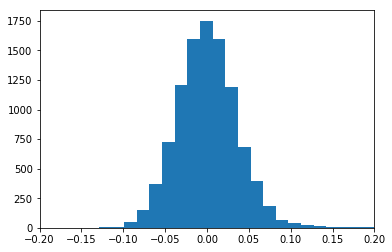

In [73]:
plt.hist(x_test[2], bins = 100)
plt.xlim([-0.2,0.2])
plt.show()